In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image 
import pandas as pd
import os

2024-09-10 19:46:23.280881: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-10 19:46:23.373109: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 19:46:23.408369: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 19:46:23.419556: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-10 19:46:23.493375: I tensorflow/core/platform/cpu_feature_guar

In [4]:
intensity_image = Image.open('sample_2_first_500_images/Sheet 2 Redo_000_X001_Y001_G001_A001_I.tiff')

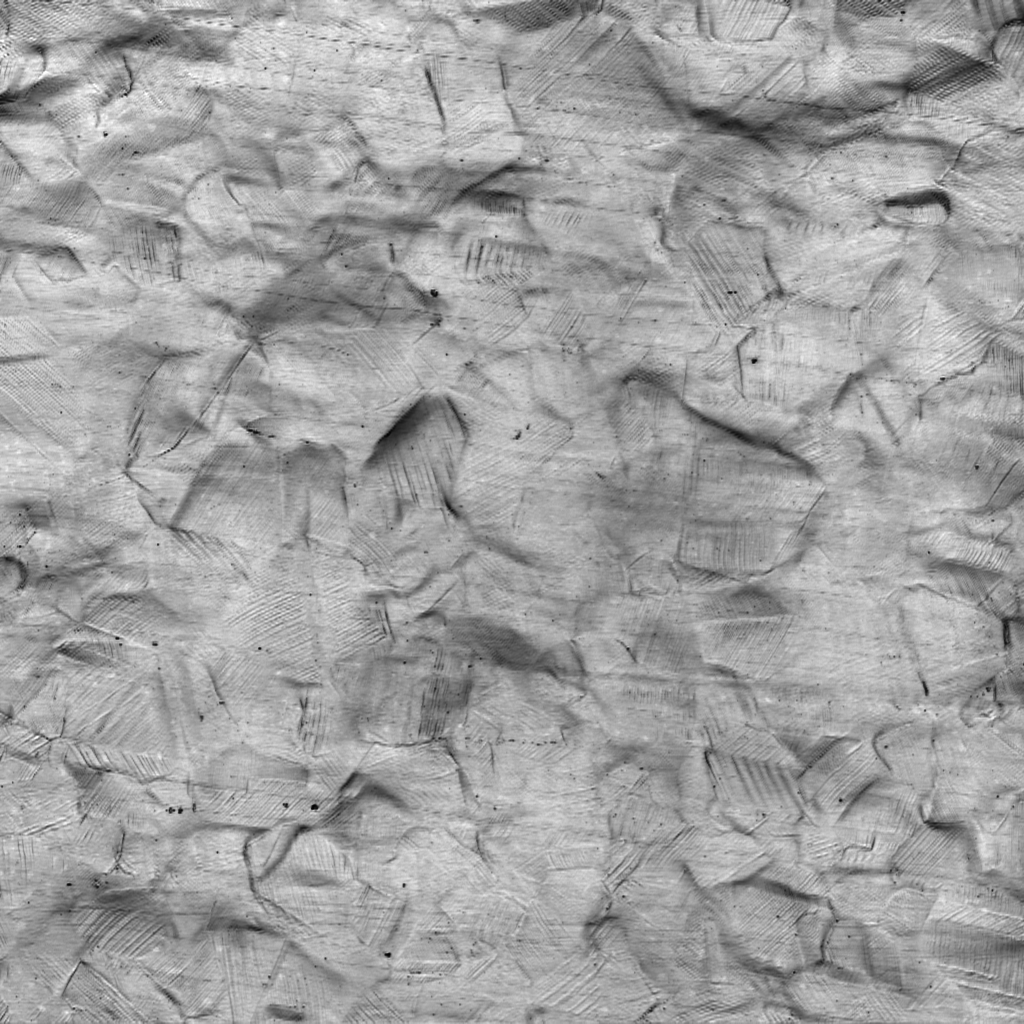

In [5]:
intensity_image

In [9]:
 image_array = np.array(intensity_image)

image_array = np.expand_dims(image_array, 0)

In [18]:
save_dir = 'sample_2_augmented'

In [26]:
def crop_and_save(image, crop_box, save_path, prefix, count):
    cropped_image = image.crop(crop_box)
    cropped_image.save(os.path.join(save_path, f"{prefix}_zoomed_{count}.tiff"))

In [42]:
width, height = intensity_image.size
crop_boxes = [
    (0, 0, width / 2, height / 2),  # Top-left
    (width / 2, 0, width, height / 2),  # Top-right
    (0, height / 2, width / 2, height),  # Bottom-left
    (width / 2, height / 2, width, height)  # Bottom-right
]

In [43]:
crop_boxes

[(0, 0, 512.0, 512.0),
 (512.0, 0, 1024, 512.0),
 (0, 512.0, 512.0, 1024),
 (512.0, 512.0, 1024, 1024)]

In [29]:
for i, crop_boxes in enumerate(crop_boxes):
    crop_and_save(intensity_image, crop_boxes, save_dir, 'sheet_2', i + 1)

In [49]:
save_dir = 'sample_6_augmented'
orig_dir = 'sample_6_second_500_images/second 500 sample 6 Intensity images'

In [50]:
for file in os.listdir(orig_dir):
    image_path = os.path.join(orig_dir, file)
    image = Image.open(image_path)
    prefix = os.path.splitext(file)[0]   
    
    for i, crop_boxe in enumerate(crop_boxes):
        crop_and_save(image, crop_box, save_dir, prefix, i + 1)

In [38]:
prefix

'Sheet 2 Redo_045_X001_Y001_G046_A001_I'

In [14]:
i = 0
# The flow method yields batches of images indefinitely, so we use a loop to generate the desired number of augmentations
for batch in datagen.flow(image_array, batch_size=1,save_to_dir=save_dir):
    i += 1
    # Stop after generating the specified number of augmentations
    if i >= num_augmentations:
        break

In [10]:
image_array

array([[[[ 71,  71,  71],
         [ 73,  73,  73],
         [ 50,  50,  50],
         ...,
         [144, 144, 144],
         [122, 122, 122],
         [113, 113, 113]],

        [[ 76,  76,  76],
         [ 78,  78,  78],
         [ 62,  62,  62],
         ...,
         [137, 137, 137],
         [121, 121, 121],
         [114, 114, 114]],

        [[ 73,  73,  73],
         [ 65,  65,  65],
         [ 53,  53,  53],
         ...,
         [134, 134, 134],
         [130, 130, 130],
         [132, 132, 132]],

        ...,

        [[141, 141, 141],
         [137, 137, 137],
         [135, 135, 135],
         ...,
         [153, 153, 153],
         [151, 151, 151],
         [142, 142, 142]],

        [[130, 130, 130],
         [129, 129, 129],
         [132, 132, 132],
         ...,
         [139, 139, 139],
         [148, 148, 148],
         [146, 146, 146]],

        [[127, 127, 127],
         [125, 125, 125],
         [127, 127, 127],
         ...,
         [127, 127, 127],
        

In [8]:
datagen = ImageDataGenerator(
    zoom_range=[0.75, 0.75]
)

In [ ]:
datagen.flow()